# Homework 6: Decision Trees and Ensemble Learning

This notebook contains solutions for Homework 6 of ML Zoomcamp 2025.

Dataset: Car Fuel Efficiency
Goal: Create a regression model to predict fuel efficiency (MPG)

## Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(1)

In [2]:
# Load the dataset
df = pd.read_csv('car_fuel_efficiency.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (9704, 11)


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nData types:\n{df.dtypes}")

Missing values per column:
engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

Data types:
engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object


## Data Preparation

Requirements:
* Fill missing values with zeros
* Do train/validation/test split with 60%/20%/20% distribution
* Use `train_test_split` with `random_state=1`
* Use `DictVectorizer(sparse=True)`

In [4]:
# Fill missing values with zeros
df = df.fillna(0)

# Verify no missing values remain
print(f"Missing values after filling: {df.isnull().sum().sum()}")

Missing values after filling: 0


In [5]:
# Separate target variable
y = df['fuel_efficiency_mpg'].values
df_features = df.drop('fuel_efficiency_mpg', axis=1)

print(f"Features shape: {df_features.shape}")
print(f"Target shape: {y.shape}")

Features shape: (9704, 10)
Target shape: (9704,)


In [6]:
# Split data: 60% train, 20% validation, 20% test
# First split: 60% train, 40% temp (validation + test)
df_train_full, df_temp, y_train_full, y_temp = train_test_split(
    df_features, y, test_size=0.4, random_state=1
)

# Second split: 50% of temp for validation, 50% for test (each 20% of original)
df_val, df_test, y_val, y_test = train_test_split(
    df_temp, y_temp, test_size=0.5, random_state=1
)

print(f"Train size: {len(df_train_full)} ({len(df_train_full)/len(df)*100:.1f}%)")
print(f"Validation size: {len(df_val)} ({len(df_val)/len(df)*100:.1f}%)")
print(f"Test size: {len(df_test)} ({len(df_test)/len(df)*100:.1f}%)")

Train size: 5822 (60.0%)
Validation size: 1941 (20.0%)
Test size: 1941 (20.0%)


In [7]:
# Convert to dictionaries for DictVectorizer
train_dicts = df_train_full.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

# Create and fit DictVectorizer
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"\nFeature names: {dv.feature_names_}")

X_train shape: (5822, 14)
X_val shape: (1941, 14)
X_test shape: (1941, 14)

Feature names: ['acceleration', 'drivetrain=All-wheel drive', 'drivetrain=Front-wheel drive', 'engine_displacement', 'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower', 'model_year', 'num_cylinders', 'num_doors', 'origin=Asia', 'origin=Europe', 'origin=USA', 'vehicle_weight']


## Question 1: Decision Tree with max_depth=1

Train a decision tree regressor with `max_depth=1` and identify which feature is used for splitting.

In [8]:
# Train decision tree with max_depth=1
dt = DecisionTreeRegressor(max_depth=1, random_state=1)
dt.fit(X_train, y_train_full)

# Get the feature used for splitting
feature_idx = dt.tree_.feature[0]
feature_name = dv.feature_names_[feature_idx]

print(f"Feature used for splitting: {feature_name}")
print(f"Feature index: {feature_idx}")

Feature used for splitting: vehicle_weight
Feature index: 13


In [9]:
# Optional: Check model performance
y_pred = dt.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE with max_depth=1: {rmse:.4f}")

RMSE with max_depth=1: 1.5937


## Question 2: Random Forest with n_estimators=10

Train a random forest regressor and calculate RMSE on validation data.

In [10]:
# Train random forest
rf = RandomForestRegressor(
    n_estimators=10,
    random_state=1,
    n_jobs=-1
)
rf.fit(X_train, y_train_full)

# Predict and calculate RMSE
y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"RMSE with n_estimators=10: {rmse:.4f}")

RMSE with n_estimators=10: 0.4603


## Question 3: Experimenting with n_estimators

Try different values of `n_estimators` from 10 to 200 with step 10.
Find after which value RMSE stops improving (to 3 decimal places).

In [11]:
# Test different n_estimators values
n_estimators_values = range(10, 201, 10)
rmse_scores = []

for n in n_estimators_values:
    rf = RandomForestRegressor(
        n_estimators=n,
        random_state=1,
        n_jobs=-1
    )
    rf.fit(X_train, y_train_full)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)
    print(f"n_estimators={n:3d}: RMSE={rmse:.4f}")

n_estimators= 10: RMSE=0.4603
n_estimators= 20: RMSE=0.4462
n_estimators= 30: RMSE=0.4398
n_estimators= 40: RMSE=0.4384
n_estimators= 50: RMSE=0.4372
n_estimators= 60: RMSE=0.4356
n_estimators= 70: RMSE=0.4361
n_estimators= 80: RMSE=0.4361
n_estimators= 90: RMSE=0.4354
n_estimators=100: RMSE=0.4353
n_estimators=110: RMSE=0.4349
n_estimators=120: RMSE=0.4355
n_estimators=130: RMSE=0.4349
n_estimators=140: RMSE=0.4351
n_estimators=150: RMSE=0.4352
n_estimators=160: RMSE=0.4352
n_estimators=170: RMSE=0.4352
n_estimators=180: RMSE=0.4352
n_estimators=190: RMSE=0.4354
n_estimators=200: RMSE=0.4350


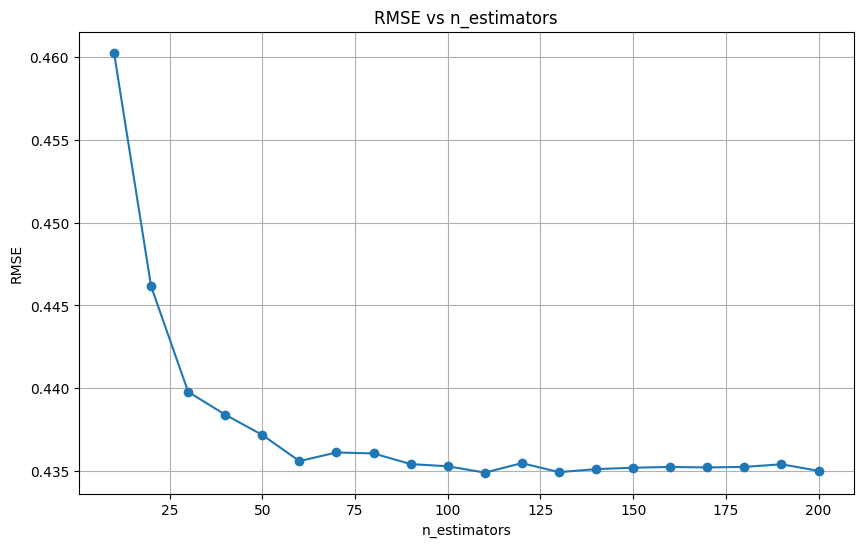

In [12]:
# Plot RMSE vs n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.grid(True)
plt.show()

In [13]:
# Find when RMSE stops improving (considering 3 decimal places)
rmse_rounded = [round(score, 3) for score in rmse_scores]

# Find the first n_estimators where RMSE doesn't improve anymore
best_rmse = min(rmse_rounded)
best_idx = rmse_rounded.index(best_rmse)
best_n_estimators = list(n_estimators_values)[best_idx]

print(f"\nBest RMSE (3 decimals): {best_rmse:.3f}")
print(f"First achieved at n_estimators: {best_n_estimators}")

# Check if RMSE stops improving after this point
print(f"\nRMSE values (rounded to 3 decimals):")
for n, score in zip(n_estimators_values, rmse_rounded):
    marker = " <-- Best" if score == best_rmse and n == best_n_estimators else ""
    print(f"n_estimators={n:3d}: {score:.3f}{marker}")


Best RMSE (3 decimals): 0.435
First achieved at n_estimators: 90

RMSE values (rounded to 3 decimals):
n_estimators= 10: 0.460
n_estimators= 20: 0.446
n_estimators= 30: 0.440
n_estimators= 40: 0.438
n_estimators= 50: 0.437
n_estimators= 60: 0.436
n_estimators= 70: 0.436
n_estimators= 80: 0.436
n_estimators= 90: 0.435 <-- Best
n_estimators=100: 0.435
n_estimators=110: 0.435
n_estimators=120: 0.435
n_estimators=130: 0.435
n_estimators=140: 0.435
n_estimators=150: 0.435
n_estimators=160: 0.435
n_estimators=170: 0.435
n_estimators=180: 0.435
n_estimators=190: 0.435
n_estimators=200: 0.435


## Question 4: Finding Best max_depth

Test different `max_depth` values: [10, 15, 20, 25]
For each max_depth, try n_estimators from 10 to 200 and calculate mean RMSE.

In [14]:
# Test different max_depth values
max_depth_values = [10, 15, 20, 25]
n_estimators_values = range(10, 201, 10)

results = {}

for max_depth in max_depth_values:
    rmse_scores = []
    
    for n in n_estimators_values:
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=max_depth,
            random_state=1,
            n_jobs=-1
        )
        rf.fit(X_train, y_train_full)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)
    
    mean_rmse = np.mean(rmse_scores)
    results[max_depth] = {
        'mean_rmse': mean_rmse,
        'rmse_scores': rmse_scores
    }
    
    print(f"max_depth={max_depth}: Mean RMSE={mean_rmse:.4f}")

max_depth=10: Mean RMSE=0.4362
max_depth=15: Mean RMSE=0.4378
max_depth=20: Mean RMSE=0.4377
max_depth=25: Mean RMSE=0.4377


In [15]:
# Find best max_depth
best_max_depth = min(results.keys(), key=lambda k: results[k]['mean_rmse'])
best_mean_rmse = results[best_max_depth]['mean_rmse']

print(f"\nBest max_depth: {best_max_depth}")
print(f"Best mean RMSE: {best_mean_rmse:.4f}")

# Summary
print("\nSummary:")
for max_depth in sorted(results.keys()):
    mean_rmse = results[max_depth]['mean_rmse']
    marker = " <-- Best" if max_depth == best_max_depth else ""
    print(f"max_depth={max_depth}: Mean RMSE={mean_rmse:.4f}{marker}")


Best max_depth: 10
Best mean RMSE: 0.4362

Summary:
max_depth=10: Mean RMSE=0.4362 <-- Best
max_depth=15: Mean RMSE=0.4378
max_depth=20: Mean RMSE=0.4377
max_depth=25: Mean RMSE=0.4377


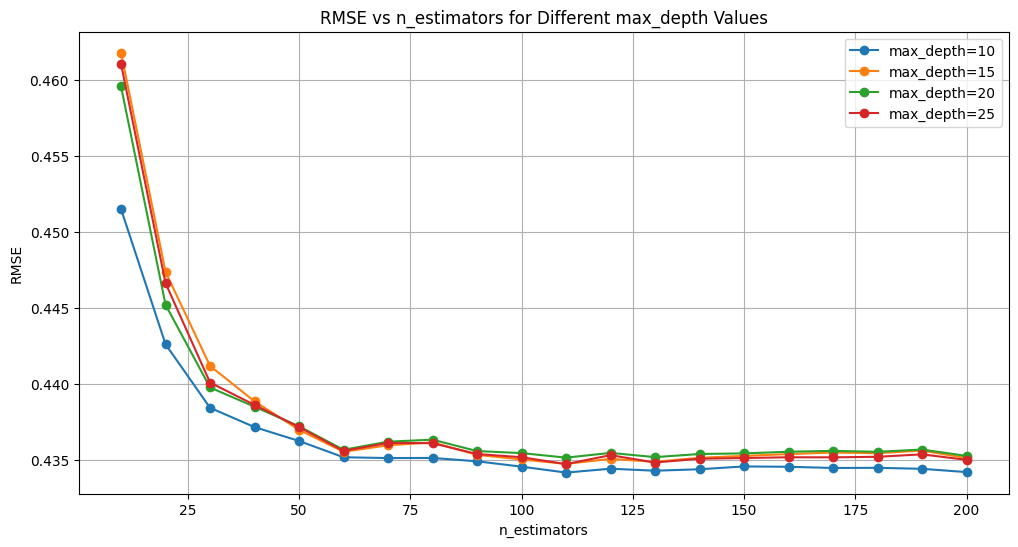

In [16]:
# Plot RMSE for different max_depth values
plt.figure(figsize=(12, 6))
for max_depth in max_depth_values:
    plt.plot(n_estimators_values, results[max_depth]['rmse_scores'], 
             marker='o', label=f'max_depth={max_depth}')

plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators for Different max_depth Values')
plt.legend()
plt.grid(True)
plt.show()

## Question 5: Feature Importance

Train a model with specific parameters and extract feature importance.
Parameters: n_estimators=10, max_depth=20, random_state=1

In [17]:
# Train model with specified parameters
rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)
rf.fit(X_train, y_train_full)

# Get feature importances
feature_importances = rf.feature_importances_
feature_names = dv.feature_names_

# Create a dataframe for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

print("Top 10 most important features:")
print(importance_df.head(10))

Top 10 most important features:
                feature  importance
13       vehicle_weight    0.959878
6            horsepower    0.015933
0          acceleration    0.011442
3   engine_displacement    0.003159
7            model_year    0.003066
8         num_cylinders    0.002323
9             num_doors    0.001576
12           origin=USA    0.000496
10          origin=Asia    0.000431
11        origin=Europe    0.000419


In [18]:
# Find the most important among the specified features
specified_features = ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']

print("\nImportance of specified features:")
for feature in specified_features:
    if feature in importance_df['feature'].values:
        importance = importance_df[importance_df['feature'] == feature]['importance'].values[0]
        print(f"{feature}: {importance:.6f}")

# Find the most important
specified_importance = importance_df[importance_df['feature'].isin(specified_features)]
most_important = specified_importance.iloc[0]
print(f"\nMost important feature (among specified): {most_important['feature']}")
print(f"Importance: {most_important['importance']:.6f}")


Importance of specified features:
vehicle_weight: 0.959878
horsepower: 0.015933
acceleration: 0.011442
engine_displacement: 0.003159

Most important feature (among specified): vehicle_weight
Importance: 0.959878


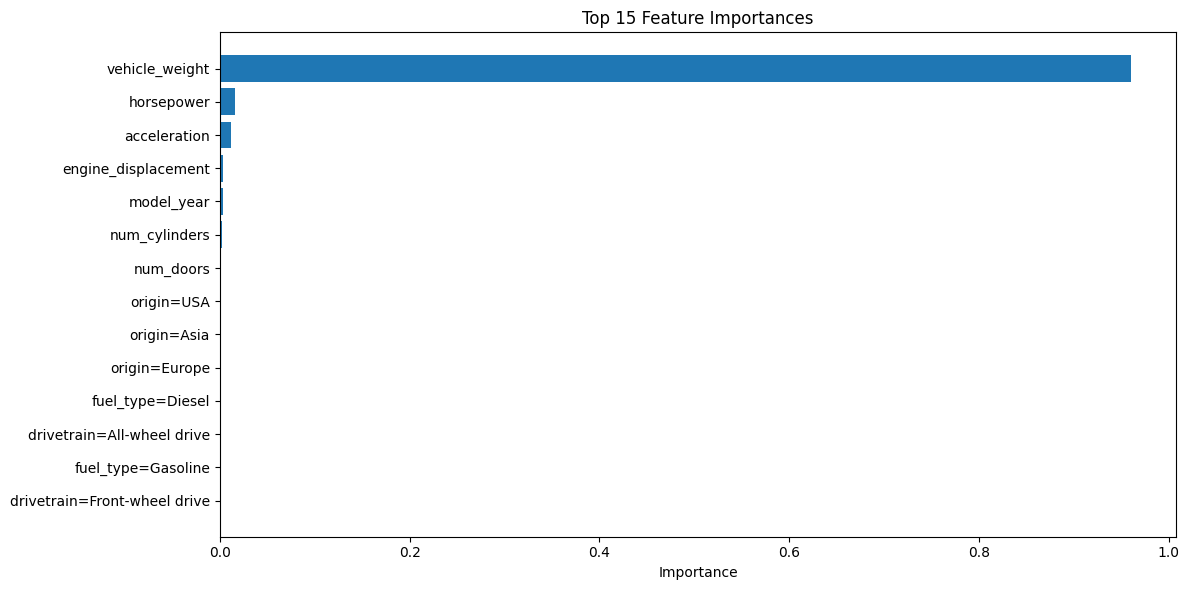

In [19]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Question 6: XGBoost with Different eta Values

Train XGBoost models with eta=0.3 and eta=0.1, compare performance.

In [20]:
# Install XGBoost if not already installed
try:
    import xgboost as xgb
    print(f"XGBoost version: {xgb.__version__}")
except ImportError:
    print("Installing XGBoost...")
    !pip install xgboost
    import xgboost as xgb
    print(f"XGBoost version: {xgb.__version__}")

Installing XGBoost...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 13.7 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 8.1 MB/s  0:00:33m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]
XGBoost version: 3.1.1


In [21]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_full)
dval = xgb.DMatrix(X_val, label=y_val)

print(f"DMatrix train shape: {dtrain.num_row()} x {dtrain.num_col()}")
print(f"DMatrix validation shape: {dval.num_row()} x {dval.num_col()}")

DMatrix train shape: 5822 x 14
DMatrix validation shape: 1941 x 14


In [22]:
# Create watchlist to monitor performance
watchlist = [(dtrain, 'train'), (dval, 'val')]

# Train with eta=0.3
print("Training with eta=0.3")
print("="*50)

xgb_params_03 = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_03 = xgb.train(
    xgb_params_03,
    dtrain,
    num_boost_round=100,
    evals=watchlist,
    verbose_eval=10
)

Training with eta=0.3
[0]	train-rmse:1.83282	val-rmse:1.82567
[10]	train-rmse:0.37400	val-rmse:0.43004
[20]	train-rmse:0.33724	val-rmse:0.42509
[30]	train-rmse:0.31757	val-rmse:0.42754
[40]	train-rmse:0.29886	val-rmse:0.43086
[50]	train-rmse:0.28277	val-rmse:0.43405
[60]	train-rmse:0.26525	val-rmse:0.43583
[70]	train-rmse:0.24983	val-rmse:0.43777
[80]	train-rmse:0.23379	val-rmse:0.43902
[90]	train-rmse:0.22023	val-rmse:0.44154
[99]	train-rmse:0.20896	val-rmse:0.44340


In [23]:
# Get final RMSE for eta=0.3
y_pred_03 = model_03.predict(dval)
rmse_03 = np.sqrt(mean_squared_error(y_val, y_pred_03))
print(f"\nFinal RMSE with eta=0.3: {rmse_03:.4f}")


Final RMSE with eta=0.3: 0.4434


In [24]:
# Train with eta=0.1
print("\nTraining with eta=0.1")
print("="*50)

xgb_params_01 = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_01 = xgb.train(
    xgb_params_01,
    dtrain,
    num_boost_round=100,
    evals=watchlist,
    verbose_eval=10
)


Training with eta=0.1
[0]	train-rmse:2.31334	val-rmse:2.30592
[10]	train-rmse:0.91846	val-rmse:0.92183
[20]	train-rmse:0.49316	val-rmse:0.52039
[30]	train-rmse:0.38552	val-rmse:0.43528
[40]	train-rmse:0.35546	val-rmse:0.41889
[50]	train-rmse:0.34115	val-rmse:0.41644
[60]	train-rmse:0.33254	val-rmse:0.41610
[70]	train-rmse:0.32553	val-rmse:0.41617
[80]	train-rmse:0.32012	val-rmse:0.41654
[90]	train-rmse:0.31718	val-rmse:0.41654
[99]	train-rmse:0.31183	val-rmse:0.41674


In [25]:
# Get final RMSE for eta=0.1
y_pred_01 = model_01.predict(dval)
rmse_01 = np.sqrt(mean_squared_error(y_val, y_pred_01))
print(f"\nFinal RMSE with eta=0.1: {rmse_01:.4f}")


Final RMSE with eta=0.1: 0.4167


In [26]:
# Compare results
print("\n" + "="*50)
print("COMPARISON")
print("="*50)
print(f"RMSE with eta=0.3: {rmse_03:.4f}")
print(f"RMSE with eta=0.1: {rmse_01:.4f}")
print(f"\nDifference: {abs(rmse_03 - rmse_01):.4f}")

if rmse_03 < rmse_01:
    print("\nBest eta: 0.3")
elif rmse_01 < rmse_03:
    print("\nBest eta: 0.1")
else:
    print("\nBoth give equal value")


COMPARISON
RMSE with eta=0.3: 0.4434
RMSE with eta=0.1: 0.4167

Difference: 0.0267

Best eta: 0.1


## Summary of Answers

In [27]:
print("="*60)
print("HOMEWORK 6 - SUMMARY OF ANSWERS")
print("="*60)
print("\nRun all cells above to see the answers to each question.")
print("\nQuestion 1: Feature used for splitting with max_depth=1")
print("Question 2: RMSE with RandomForest (n_estimators=10)")
print("Question 3: n_estimators value where RMSE stops improving")
print("Question 4: Best max_depth based on mean RMSE")
print("Question 5: Most important feature among the specified ones")
print("Question 6: Which eta value leads to best RMSE (0.3 vs 0.1)")
print("="*60)

HOMEWORK 6 - SUMMARY OF ANSWERS

Run all cells above to see the answers to each question.

Question 1: Feature used for splitting with max_depth=1
Question 2: RMSE with RandomForest (n_estimators=10)
Question 3: n_estimators value where RMSE stops improving
Question 4: Best max_depth based on mean RMSE
Question 5: Most important feature among the specified ones
Question 6: Which eta value leads to best RMSE (0.3 vs 0.1)
